In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
from tqdm import tqdm
from copy import deepcopy
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import NMF
from sklearn.metrics import pairwise_distances

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_info_columns', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [2]:
with open(f'../pickles/user_score_df_complete.pkl', 'rb') as read_file:
    user_score_df = pickle.load(read_file)

In [18]:
anime_titles = user_score_df.drop(columns=['user_id', 'animelist_url']).columns.to_list()

In [56]:
user_score_df[user_score_df['user_id'] == 'killuagon646']

,user_id,animelist_url,Fullmetal Alchemist: Brotherhood,Steins;Gate,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama°,Gintama',Shingeki no Kyojin Season 3 Part 2,Gintama': Enchousen,3-gatsu no Lion 2nd Season,Kimi no Na wa.,Koe no Katachi,Gintama.,Clannad: After Story,Gintama,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen,Kizumonogatari III: Reiketsu-hen,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen,Shigatsu wa Kimi no Uso,Cowboy Bebop,Gintama.: Shirogane no Tamashii-hen,Haikyuu!! Second Season,Made in Abyss,Monogatari Series: Second Season,Mushishi Zoku Shou 2nd Season,Hajime no Ippo,Mononoke Hime,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen,Vinland Saga,Code Geass: Hangyaku no Lelouch,Monster,Mushishi Zoku Shou,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,Great Teacher Onizuka,Kimetsu no Yaiba,Mushishi,Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai,Tengen Toppa Gurren Lagann,Hajime no Ippo: New Challenger,Natsume Yuujinchou Shi,Howl no Ugoku Shiro,Ookami Kodomo no Ame to Yuki,Suzumiya Haruhi no Shoushitsu,Yakusoku no Neverland,Natsume Yuujinchou Roku,Ashita no Joe 2,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,Mushishi Zoku Shou: Suzu no Shizuku,Death Note,Kizumonogatari II: Nekketsu-hen,Ping Pong the Animation,One Punch Man,Violet Evergarden,Shouwa Genroku Rakugo Shinjuu,Yojouhan Shinwa Taikei,Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly,Hajime no Ippo: Rising,Natsume Yuujinchou San,Bakuman. 3rd Season,Fate/Zero 2nd Season,Natsume Yuujinchou Go,Kimi no Suizou wo Tabetai,Sora yori mo Tooi Basho,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Zoku Natsume Yuujinchou,Haikyuu!!,Mushishi: Hihamukage,Kara no Kyoukai 5: Mujun Rasen,Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu,Ansatsu Kyoushitsu 2nd Season,Aria the Origination,Chihayafuru 3,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,Gintama.: Porori-hen,JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai,Rainbow: Nisha Rokubou no Shichinin,Slam Dunk,Uchuu Kyoudai,Saiki Kusuo no Ψ-nan 2,Steins;Gate 0,Gintama Movie 1: Shinyaku Benizakura-hen,Hotaru no Haka,Mo Dao Zu Shi,Neon Genesis Evangelion: The End of Evangelion,Shingeki no Kyojin Season 3,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,Samurai Champloo,Kingdom 3rd Season,Mob Psycho 100,JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season,Nichijou,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan,One Piece,Saiki Kusuo no Ψ-nan,Tenki no Ko,Kaze ga Tsuyoku Fuiteiru,Kenpuu Denki Berserk,Major S5,Mushishi Zoku Shou: Odoro no Michi,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Chihayafuru 2,Cross Game,Haikyuu!!: To the Top,Kara no Kyoukai 7: Satsujin Kousatsu (Go),Koukaku Kidoutai: Stand Alone Complex,Nana,Owarimonogatari,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,Usagi Drop,Yuu☆Yuu☆Hakusho,Shingeki no Kyojin,3-gatsu no Lion,Boku no Hero Academia 2nd Season,Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen,Kono Oto Tomare! 2nd Season,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari,Gintama: Yorinuki Gintama-san on Theater 2D,Hunter x Hunter,Kiseijuu: Sei no Kakuritsu,Perfect Blue,Violet Evergarden Gaiden: Eien to Jidou Shuki Ningyou,Baccano!,Bakuman. 2nd Season,Barakamon,Gintama°: Aizome Kaori-hen,Hellsing Ultimate,Hotarubi no Mori e,Houseki no Kuni (TV),Kaze no Tani no Nausicaä,Mononoke,Boku dake ga Inai Machi,Kingdom 2nd Season,Kizumonogatari I: Tekketsu-hen,Mo Dao Zu Shi 2nd Season,Natsume Yuujinchou Movie: Utsusemi ni Musubu,Natsume Yuujinchou Roku Specials,Grand Blue,Kamisama Hajimemashita: Kako-hen,No Game No Life: Zero,Psycho-Pass,Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai,Shingeki

In [207]:
sum([user_score_df['Kenpuu Denki Berserk'] != 0]).value_counts()

0    113897
1      6103
Name: Kenpuu Denki Berserk, dtype: int64

In [225]:
sum([user_score_df['Rurouni Kenshin: Meiji Kenkaku Romantan'] != 0]).value_counts()

0    114342
1      5658
Name: Rurouni Kenshin: Meiji Kenkaku Romantan, dtype: int64

In [208]:
sum([user_score_df['Fullmetal Alchemist: Brotherhood'] != 0]).value_counts()

0    93147
1    26853
Name: Fullmetal Alchemist: Brotherhood, dtype: int64

In [97]:
user_score_df.head()

,user_id,animelist_url,Fullmetal Alchemist: Brotherhood,Steins;Gate,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama°,Gintama',Shingeki no Kyojin Season 3 Part 2,Gintama': Enchousen,3-gatsu no Lion 2nd Season,Kimi no Na wa.,Koe no Katachi,Gintama.,Clannad: After Story,Gintama,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen,Kizumonogatari III: Reiketsu-hen,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen,Shigatsu wa Kimi no Uso,Cowboy Bebop,Gintama.: Shirogane no Tamashii-hen,Haikyuu!! Second Season,Made in Abyss,Monogatari Series: Second Season,Mushishi Zoku Shou 2nd Season,Hajime no Ippo,Mononoke Hime,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen,Vinland Saga,Code Geass: Hangyaku no Lelouch,Monster,Mushishi Zoku Shou,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,Great Teacher Onizuka,Kimetsu no Yaiba,Mushishi,Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai,Tengen Toppa Gurren Lagann,Hajime no Ippo: New Challenger,Natsume Yuujinchou Shi,Howl no Ugoku Shiro,Ookami Kodomo no Ame to Yuki,Suzumiya Haruhi no Shoushitsu,Yakusoku no Neverland,Natsume Yuujinchou Roku,Ashita no Joe 2,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,Mushishi Zoku Shou: Suzu no Shizuku,Death Note,Kizumonogatari II: Nekketsu-hen,Ping Pong the Animation,One Punch Man,Violet Evergarden,Shouwa Genroku Rakugo Shinjuu,Yojouhan Shinwa Taikei,Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly,Hajime no Ippo: Rising,Natsume Yuujinchou San,Bakuman. 3rd Season,Fate/Zero 2nd Season,Natsume Yuujinchou Go,Kimi no Suizou wo Tabetai,Sora yori mo Tooi Basho,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Zoku Natsume Yuujinchou,Haikyuu!!,Mushishi: Hihamukage,Kara no Kyoukai 5: Mujun Rasen,Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu,Ansatsu Kyoushitsu 2nd Season,Aria the Origination,Chihayafuru 3,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,Gintama.: Porori-hen,JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai,Rainbow: Nisha Rokubou no Shichinin,Slam Dunk,Uchuu Kyoudai,Saiki Kusuo no Ψ-nan 2,Steins;Gate 0,Gintama Movie 1: Shinyaku Benizakura-hen,Hotaru no Haka,Mo Dao Zu Shi,Neon Genesis Evangelion: The End of Evangelion,Shingeki no Kyojin Season 3,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,Samurai Champloo,Kingdom 3rd Season,Mob Psycho 100,JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season,Nichijou,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan,One Piece,Saiki Kusuo no Ψ-nan,Tenki no Ko,Kaze ga Tsuyoku Fuiteiru,Kenpuu Denki Berserk,Major S5,Mushishi Zoku Shou: Odoro no Michi,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Chihayafuru 2,Cross Game,Haikyuu!!: To the Top,Kara no Kyoukai 7: Satsujin Kousatsu (Go),Koukaku Kidoutai: Stand Alone Complex,Nana,Owarimonogatari,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,Usagi Drop,Yuu☆Yuu☆Hakusho,Shingeki no Kyojin,3-gatsu no Lion,Boku no Hero Academia 2nd Season,Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen,Kono Oto Tomare! 2nd Season,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari,Gintama: Yorinuki Gintama-san on Theater 2D,Hunter x Hunter,Kiseijuu: Sei no Kakuritsu,Perfect Blue,Violet Evergarden Gaiden: Eien to Jidou Shuki Ningyou,Baccano!,Bakuman. 2nd Season,Barakamon,Gintama°: Aizome Kaori-hen,Hellsing Ultimate,Hotarubi no Mori e,Houseki no Kuni (TV),Kaze no Tani no Nausicaä,Mononoke,Boku dake ga Inai Machi,Kingdom 2nd Season,Kizumonogatari I: Tekketsu-hen,Mo Dao Zu Shi 2nd Season,Natsume Yuujinchou Movie: Utsusemi ni Musubu,Natsume Yuujinchou Roku Specials,Grand Blue,Kamisama Hajimemashita: Kako-hen,No Game No Life: Zero,Psycho-Pass,Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai,Shingeki

## NMF to create user/anime embeddings for collaborative-filtering ##

In [159]:
nmf = NMF(6, max_iter=500, random_state=4444)
user_embedding = nmf.fit_transform(user_score_df.drop(columns=['user_id', 'animelist_url']))

In [160]:
user_embedding_df = pd.DataFrame(user_embedding.round(2))
anime_embedding_df = pd.DataFrame(nmf.components_.round(2),
                                  columns=anime_titles)

In [171]:
anime_embedding_df.shape
anime_embedding_df.head(6)

(6, 1000)

,Fullmetal Alchemist: Brotherhood,Steins;Gate,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama°,Gintama',Shingeki no Kyojin Season 3 Part 2,Gintama': Enchousen,3-gatsu no Lion 2nd Season,Kimi no Na wa.,Koe no Katachi,Gintama.,Clannad: After Story,Gintama,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen,Kizumonogatari III: Reiketsu-hen,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen,Shigatsu wa Kimi no Uso,Cowboy Bebop,Gintama.: Shirogane no Tamashii-hen,Haikyuu!! Second Season,Made in Abyss,Monogatari Series: Second Season,Mushishi Zoku Shou 2nd Season,Hajime no Ippo,Mononoke Hime,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen,Vinland Saga,Code Geass: Hangyaku no Lelouch,Monster,Mushishi Zoku Shou,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,Great Teacher Onizuka,Kimetsu no Yaiba,Mushishi,Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai,Tengen Toppa Gurren Lagann,Hajime no Ippo: New Challenger,Natsume Yuujinchou Shi,Howl no Ugoku Shiro,Ookami Kodomo no Ame to Yuki,Suzumiya Haruhi no Shoushitsu,Yakusoku no Neverland,Natsume Yuujinchou Roku,Ashita no Joe 2,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,Mushishi Zoku Shou: Suzu no Shizuku,Death Note,Kizumonogatari II: Nekketsu-hen,Ping Pong the Animation,One Punch Man,Violet Evergarden,Shouwa Genroku Rakugo Shinjuu,Yojouhan Shinwa Taikei,Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly,Hajime no Ippo: Rising,Natsume Yuujinchou San,Bakuman. 3rd Season,Fate/Zero 2nd Season,Natsume Yuujinchou Go,Kimi no Suizou wo Tabetai,Sora yori mo Tooi Basho,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Zoku Natsume Yuujinchou,Haikyuu!!,Mushishi: Hihamukage,Kara no Kyoukai 5: Mujun Rasen,Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu,Ansatsu Kyoushitsu 2nd Season,Aria the Origination,Chihayafuru 3,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,Gintama.: Porori-hen,JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai,Rainbow: Nisha Rokubou no Shichinin,Slam Dunk,Uchuu Kyoudai,Saiki Kusuo no Ψ-nan 2,Steins;Gate 0,Gintama Movie 1: Shinyaku Benizakura-hen,Hotaru no Haka,Mo Dao Zu Shi,Neon Genesis Evangelion: The End of Evangelion,Shingeki no Kyojin Season 3,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,Samurai Champloo,Kingdom 3rd Season,Mob Psycho 100,JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season,Nichijou,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan,One Piece,Saiki Kusuo no Ψ-nan,Tenki no Ko,Kaze ga Tsuyoku Fuiteiru,Kenpuu Denki Berserk,Major S5,Mushishi Zoku Shou: Odoro no Michi,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Chihayafuru 2,Cross Game,Haikyuu!!: To the Top,Kara no Kyoukai 7: Satsujin Kousatsu (Go),Koukaku Kidoutai: Stand Alone Complex,Nana,Owarimonogatari,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,Usagi Drop,Yuu☆Yuu☆Hakusho,Shingeki no Kyojin,3-gatsu no Lion,Boku no Hero Academia 2nd Season,Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen,Kono Oto Tomare! 2nd Season,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari,Gintama: Yorinuki Gintama-san on Theater 2D,Hunter x Hunter,Kiseijuu: Sei no Kakuritsu,Perfect Blue,Violet Evergarden Gaiden: Eien to Jidou Shuki Ningyou,Baccano!,Bakuman. 2nd Season,Barakamon,Gintama°: Aizome Kaori-hen,Hellsing Ultimate,Hotarubi no Mori e,Houseki no Kuni (TV),Kaze no Tani no Nausicaä,Mononoke,Boku dake ga Inai Machi,Kingdom 2nd Season,Kizumonogatari I: Tekketsu-hen,Mo Dao Zu Shi 2nd Season,Natsume Yuujinchou Movie: Utsusemi ni Musubu,Natsume Yuujinchou Roku Specials,Grand Blue,Kamisama Hajimemashita: Kako-hen,No Game No Life: Zero,Psycho-Pass,Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai,Shingeki no Kyojin Season 2,Uc

In [162]:
anime_embedding_df.T.head()

,0,1,2,3,4,5
Fullmetal Alchemist: Brotherhood,6.28,4.61,5.49,10.28,1.32,1.6
Steins;Gate,6.74,3.19,0.00,2.09,6.59,0.0
Hunter x Hunter (2011),7.65,0.11,3.94,5.52,0.00,0.0
Ginga Eiyuu Densetsu,0.00,1.17,0.52,0.00,0.00,0.0
Gintama°,0.71,0.00,3.21,0.51,0.00,0.0


In [163]:
user_embedding_df.shape
user_embedding_df.head()

(120000, 6)

,0,1,2,3,4,5
0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.03,0.38,0.07,0.09,0.00,0.04
2,0.00,0.14,0.03,0.13,0.00,0.00
3,0.00,0.63,0.00,0.36,0.00,0.00
4,0.11,0.22,0.10,0.27,0.04,0.33


In [164]:
np.sort(nmf.components_.round(2), axis=1)

array([[ 0.  ,  0.  ,  0.  , ..., 12.44, 13.15, 14.72],
       [ 0.  ,  0.  ,  0.  , ...,  8.77, 10.89, 12.25],
       [ 0.  ,  0.  ,  0.  , ...,  6.37,  6.76,  6.93],
       [ 0.  ,  0.  ,  0.  , ..., 13.63, 14.7 , 14.75],
       [ 0.  ,  0.  ,  0.  , ..., 11.58, 11.73, 12.39],
       [ 0.  ,  0.  ,  0.  , ..., 12.76, 16.76, 17.57]])

In [165]:
top_anime_indices

array([[117, 758,   1,  57, 243, 125, 146,  54,   0, 474],
       [ 25, 206, 437, 488,  35,  92, 361, 299, 292,  43],
       [137,  16,  35, 293, 166,  65, 297, 360, 310, 130],
       [684, 359, 803,  99,  54, 318, 892, 299, 486,   0],
       [397,  12, 310, 496, 734, 675, 218, 106, 658, 355],
       [ 19,  46,  32, 179, 242,  87, 650, 191, 135, 271],
       [119, 164, 297,  40,   9,  10, 148,  90,   6, 165],
       [287, 837, 243, 701, 340, 431, 354, 736, 817, 810],
       [338, 339,  95,  80, 377,  52, 152, 206,  94,  89],
       [286, 816, 426, 473, 468, 427, 959, 490, 294, 302]])

In [166]:
anime_titles[0]

'Fullmetal Alchemist: Brotherhood'

In [167]:
# Find indices for top X anime with highest weights for each feature
top_anime_indices = nmf.components_.argsort(axis=1)[:, -1:-11:-1]
top_anime_per_feature = [[anime_titles[idx] for idx in idx_list] for idx_list in top_anime_indices]

In [168]:
top_anime_per_feature

[['One Punch Man',
  'Boku no Hero Academia',
  'Boku no Hero Academia 2nd Season',
  'Kimi no Na wa.',
  'Re:Zero kara Hajimeru Isekai Seikatsu',
  'Shingeki no Kyojin Season 2',
  'Mob Psycho 100',
  'No Game No Life',
  'Boku no Hero Academia 3rd Season',
  'Shingeki no Kyojin'],
 ['Cowboy Bebop',
  'Neon Genesis Evangelion',
  'FLCL',
  'Neon Genesis Evangelion: The End of Evangelion',
  'Akira',
  'Tengen Toppa Gurren Lagann',
  'Koukaku Kidoutai',
  'Samurai Champloo',
  'Black Lagoon',
  'Code Geass: Hangyaku no Lelouch'],
 ['Boku dake ga Inai Machi',
  'Boku no Hero Academia',
  'Death Parade',
  'Boku no Hero Academia 2nd Season',
  'Code Geass: Hangyaku no Lelouch R2',
  'Angel Beats!',
  'Ansatsu Kyoushitsu',
  'Fate/Zero 2nd Season',
  'Fate/Zero',
  'Code Geass: Hangyaku no Lelouch'],
 ['Naruto',
  'Death Note',
  'Bleach',
  'Naruto: Shippuuden',
  'One Piece',
  'Fullmetal Alchemist: Brotherhood',
  'Fairy Tail',
  'Fullmetal Alchemist',
  'Code Geass: Hangyaku no Lelouc

## Finding optimal k (number of latent features) ##

In [86]:
u, sigma, v_t = randomized_svd(user_score_df.drop(columns=['user_id', 'animelist_url']).to_numpy(), 
                               n_components=20,
                               n_iter=6,
                               random_state=4444)

In [87]:
sigma

array([6662.44548475, 2861.24776111, 2254.62954461, 2102.05708112,
       2017.74441506, 1835.46064548, 1531.92442063, 1439.28712841,
       1365.18803998, 1358.23505527, 1328.16928725, 1237.58659558,
       1192.35319052, 1171.88468422, 1162.8176796 , 1132.90953613,
       1085.18593348, 1081.45594725, 1066.60790719, 1048.31092271])

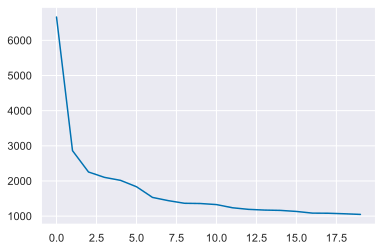

In [89]:
plt.plot(range(20), sigma)

## Collaborative-filtering ##

In [91]:
# A pairwise distance matrix must be constructed from comparins vectors of the same length
# since how would you compare the distance between a 2d vector and 100d vector, for example? 
# The Euclidean distance formula looks at the squared distance between each component of the vector
user_anime_cosine_distances = pairwise_distances(user_embedding_df, anime_embedding_df.T, 
                                                 metric='cosine')

In [100]:
# Because user #0 (cindia) hasn't rated any movies, their user vector is the zero vector.
# The zero vector is orthogonal to any given vector since the dot product of any vector with the zero
# vector is 0. Othogonal vectors have a cosine (similarity) of 0, hence their cosine distance is 1.
# Recall that cosine distance = 1 - cosine similarity
user_anime_cosine_distances[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [178]:
user_anime_cosine_distances[1]

array([0.41521695, 0.60589336, 0.74466103, 0.06051116, 0.78058344,
       0.64508188, 0.92497655, 0.72011133, 0.80824002, 0.86460689,
       0.86455373, 0.81143648, 0.84279227, 0.49102361, 0.73666146,
       0.87419654, 0.30871459, 0.81222765, 0.88994233, 0.66441345,
       0.81342038, 0.86258862, 0.7872985 , 0.63366584, 0.90735675,
       0.02108731, 0.81358691, 0.80387686, 0.76256601, 0.8310897 ,
       0.34850591, 0.36033888, 0.52796553, 0.0190716 , 0.92497655,
       0.2977071 , 0.01682228, 0.30796719, 0.92497655, 0.07461926,
       0.8894476 , 0.12663516, 0.92532992, 0.08498119, 0.42308328,
       0.85109935, 0.69154013, 0.88069355, 0.57755024, 0.91565109,
       0.82648331, 0.36096804, 0.76024165, 0.40485154, 0.45542987,
       0.77170188, 0.23310258, 0.81340654, 0.89792394, 0.63986017,
       0.1137006 , 0.78480449, 0.61268618, 0.85427914, 0.79025541,
       0.5443306 , 0.82481973, 0.86483161, 0.9098958 , 0.08053322,
       0.8110178 , 0.77564605, 0.30037776, 0.11021143, 0.89731

In [101]:
user_anime_cosine_distances.shape

(120000, 1000)

In [123]:
user_score_df.at[1, 'user_id']

'Yuber'

In [131]:
user_score_df[user_score_df['user_id'] == 'Yuber'].index[0]

1

In [145]:
user_score_df.head()

,user_id,animelist_url,Fullmetal Alchemist: Brotherhood,Steins;Gate,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama°,Gintama',Shingeki no Kyojin Season 3 Part 2,Gintama': Enchousen,3-gatsu no Lion 2nd Season,Kimi no Na wa.,Koe no Katachi,Gintama.,Clannad: After Story,Gintama,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen,Kizumonogatari III: Reiketsu-hen,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futatabi-hen,Shigatsu wa Kimi no Uso,Cowboy Bebop,Gintama.: Shirogane no Tamashii-hen,Haikyuu!! Second Season,Made in Abyss,Monogatari Series: Second Season,Mushishi Zoku Shou 2nd Season,Hajime no Ippo,Mononoke Hime,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen,Vinland Saga,Code Geass: Hangyaku no Lelouch,Monster,Mushishi Zoku Shou,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,Great Teacher Onizuka,Kimetsu no Yaiba,Mushishi,Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai,Tengen Toppa Gurren Lagann,Hajime no Ippo: New Challenger,Natsume Yuujinchou Shi,Howl no Ugoku Shiro,Ookami Kodomo no Ame to Yuki,Suzumiya Haruhi no Shoushitsu,Yakusoku no Neverland,Natsume Yuujinchou Roku,Ashita no Joe 2,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,Mushishi Zoku Shou: Suzu no Shizuku,Death Note,Kizumonogatari II: Nekketsu-hen,Ping Pong the Animation,One Punch Man,Violet Evergarden,Shouwa Genroku Rakugo Shinjuu,Yojouhan Shinwa Taikei,Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly,Hajime no Ippo: Rising,Natsume Yuujinchou San,Bakuman. 3rd Season,Fate/Zero 2nd Season,Natsume Yuujinchou Go,Kimi no Suizou wo Tabetai,Sora yori mo Tooi Basho,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Zoku Natsume Yuujinchou,Haikyuu!!,Mushishi: Hihamukage,Kara no Kyoukai 5: Mujun Rasen,Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu,Ansatsu Kyoushitsu 2nd Season,Aria the Origination,Chihayafuru 3,Koukaku Kidoutai: Stand Alone Complex 2nd GIG,Gintama.: Porori-hen,JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai,Rainbow: Nisha Rokubou no Shichinin,Slam Dunk,Uchuu Kyoudai,Saiki Kusuo no Ψ-nan 2,Steins;Gate 0,Gintama Movie 1: Shinyaku Benizakura-hen,Hotaru no Haka,Mo Dao Zu Shi,Neon Genesis Evangelion: The End of Evangelion,Shingeki no Kyojin Season 3,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,Samurai Champloo,Kingdom 3rd Season,Mob Psycho 100,JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season,Nichijou,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan,One Piece,Saiki Kusuo no Ψ-nan,Tenki no Ko,Kaze ga Tsuyoku Fuiteiru,Kenpuu Denki Berserk,Major S5,Mushishi Zoku Shou: Odoro no Michi,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Chihayafuru 2,Cross Game,Haikyuu!!: To the Top,Kara no Kyoukai 7: Satsujin Kousatsu (Go),Koukaku Kidoutai: Stand Alone Complex,Nana,Owarimonogatari,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,Usagi Drop,Yuu☆Yuu☆Hakusho,Shingeki no Kyojin,3-gatsu no Lion,Boku no Hero Academia 2nd Season,Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen,Kono Oto Tomare! 2nd Season,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari,Gintama: Yorinuki Gintama-san on Theater 2D,Hunter x Hunter,Kiseijuu: Sei no Kakuritsu,Perfect Blue,Violet Evergarden Gaiden: Eien to Jidou Shuki Ningyou,Baccano!,Bakuman. 2nd Season,Barakamon,Gintama°: Aizome Kaori-hen,Hellsing Ultimate,Hotarubi no Mori e,Houseki no Kuni (TV),Kaze no Tani no Nausicaä,Mononoke,Boku dake ga Inai Machi,Kingdom 2nd Season,Kizumonogatari I: Tekketsu-hen,Mo Dao Zu Shi 2nd Season,Natsume Yuujinchou Movie: Utsusemi ni Musubu,Natsume Yuujinchou Roku Specials,Grand Blue,Kamisama Hajimemashita: Kako-hen,No Game No Life: Zero,Psycho-Pass,Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai,Shingeki

In [218]:
user_embedding_df.iloc[1:5].sum(axis=1)

1    0.61
2    0.30
3    0.99
4    1.07
dtype: float64

In [216]:
len(get_user_scores_from_df('Zetsuji'))

93

In [213]:
len(get_user_scores_from_df('baxter'))

63

In [147]:
get_user_scores_from_df('bellico')

{'user_id': 'bellico',
 'animelist_url': 'https://myanimelist.net/animelist/bellico',
 'Code Geass: Hangyaku no Lelouch': 8,
 'Death Note': 8,
 'Hellsing Ultimate': 8,
 'Black Lagoon: The Second Barrage': 9,
 'Akira': 9,
 'Darker than Black: Kuro no Keiyakusha': 9,
 'Black Lagoon': 8,
 'Bleach': 7,
 'Claymore': 8}

In [214]:
len(get_user_scores_from_df('Yuber'))

52

In [124]:
Yuber_dict = {}
for col in user_score_df[user_score_df['user_id'] == 'Yuber']:
    if user_score_df.at[1, col] != 0:
        Yuber_dict[col] = user_score_df.at[1, col]

In [126]:
'Final Fantasy VII: Advent Children' in anime_titles

True

In [125]:
Yuber_dict

{'user_id': 'Yuber',
 'animelist_url': 'https://myanimelist.net/animelist/Yuber',
 'Fullmetal Alchemist: Brotherhood': 9,
 'Gintama': 9,
 'Sen to Chihiro no Kamikakushi': 9,
 'Cowboy Bebop': 10,
 'Tengen Toppa Gurren Lagann': 10,
 'Howl no Ugoku Shiro': 9,
 'Fate/Zero 2nd Season': 9,
 'JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai': 9,
 'Gintama Movie 1: Shinyaku Benizakura-hen': 7,
 'Neon Genesis Evangelion: The End of Evangelion': 8,
 'JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season': 9,
 'Yuu☆Yuu☆Hakusho': 8,
 'Hellsing Ultimate': 9,
 'Cowboy Bebop: Tengoku no Tobira': 10,
 'Fate/Zero': 9,
 'Detective Conan Movie 06: The Phantom of Baker Street': 5,
 'Neon Genesis Evangelion': 8,
 'Gyakkyou Burai Kaiji: Ultimate Survivor': 10,
 'Gyakkyou Burai Kaiji: Hakairoku-hen': 9,
 'One Piece Film: Strong World': 10,
 'Detective Conan': 9,
 'Dragon Ball Z': 8,
 'Cardcaptor Sakura': 8,
 'JoJo no Kimyou na Bouken (TV)': 9,
 'JoJo no Kimyou na Bouken Part 3: Stardust Crusade

In [175]:
latent_features = ['Popular',
                   'Action-packed classics',
                   'Supernatural/fantasy',
                   'Shounen',
                   'Slice-of-life/school',
                   'Artsy classics']

In [176]:
user_embedding_df.columns = latent_features                         

In [177]:
user_embedding_df.head()

,Popular,Action-packed classics,Supernatural/fantasy,Shounen,Slice-of-life/school,Artsy classics
0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.03,0.38,0.07,0.09,0.00,0.04
2,0.00,0.14,0.03,0.13,0.00,0.00
3,0.00,0.63,0.00,0.36,0.00,0.00
4,0.11,0.22,0.10,0.27,0.04,0.33


Create a function to get the top X collaborative-filtering recommendations and filter out anime that are already in the user's animelist

In [241]:
def get_user_scores_from_df(user_id, user_score_df=user_score_df):
    """Returns a dict of all non-zero user scores, including metadata."""
    user_idx = get_user_idx(user_id)
    user_score_dict = {}
    for col in user_score_df[user_score_df['user_id'] == user_id]:
        if user_score_df.at[user_idx, col] != 0:
            user_score_dict[col] = user_score_df.at[user_idx, col]
    return user_score_dict    

In [242]:
get_user_scores_from_df('Yuber')

{'user_id': 'Yuber',
 'animelist_url': 'https://myanimelist.net/animelist/Yuber',
 'Fullmetal Alchemist: Brotherhood': 9,
 'Gintama': 9,
 'Sen to Chihiro no Kamikakushi': 9,
 'Cowboy Bebop': 10,
 'Tengen Toppa Gurren Lagann': 10,
 'Howl no Ugoku Shiro': 9,
 'Fate/Zero 2nd Season': 9,
 'JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai': 9,
 'Gintama Movie 1: Shinyaku Benizakura-hen': 7,
 'Neon Genesis Evangelion: The End of Evangelion': 8,
 'JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season': 9,
 'Yuu☆Yuu☆Hakusho': 8,
 'Hellsing Ultimate': 9,
 'Cowboy Bebop: Tengoku no Tobira': 10,
 'Fate/Zero': 9,
 'Detective Conan Movie 06: The Phantom of Baker Street': 5,
 'Neon Genesis Evangelion': 8,
 'Gyakkyou Burai Kaiji: Ultimate Survivor': 10,
 'Gyakkyou Burai Kaiji: Hakairoku-hen': 9,
 'One Piece Film: Strong World': 10,
 'Detective Conan': 9,
 'Dragon Ball Z': 8,
 'Cardcaptor Sakura': 8,
 'JoJo no Kimyou na Bouken (TV)': 9,
 'JoJo no Kimyou na Bouken Part 3: Stardust Crusade

In [243]:
def get_user_idx(user_id, user_score_df=user_score_df):
    """Returns the index of the user in user_score_df."""        
    return user_score_df[user_score_df['user_id'] == user_id].index[0]

In [244]:
get_user_idx('baxter')

3

In [245]:
len(anime_titles)

1000

In [246]:
user_anime_cosine_distances.shape

(120000, 1000)

In [229]:
# Top 10 collaborative-filtering recommendations for user #1 ('Yuber')
# Make sure to filter out recommendations that are already in the user's animelist
# Create a function to get the top X collaborative-filtering recommendations and filter out
# anime that are already in the user's animelist
Yuber_recs = [anime_titles[idx] for idx in user_anime_cosine_distances[1].argsort()
              if anime_titles[idx] not in get_user_scores_from_df('Yuber')][:100]

In [248]:
# May need to change this function to make it quicker
def get_collab_filt_recs(user_id, dist_matrix=user_anime_cosine_distances, 
                         anime_titles=anime_titles, num_recs=100):
    """Return the collaborative-filtering recommendations for a user_id."""
    user_idx = get_user_idx(user_id)
    # Get back recommendations without any recommendations that user has in their
    # anime list
    recs = [anime_titles[idx] for idx in dist_matrix[user_idx].argsort()
            if anime_titles[idx] not in get_user_scores_from_df(user_id)][:num_recs]
    return recs

In [252]:
Yuber_recs_2 = get_collab_filt_recs('Yuber')

In [253]:
Yuber_recs_2 == Yuber_recs

True

In [219]:
# Top 10 collaborative-filtering recommendations for user #2 ('bellico')
bellico_recs = [anime_titles[idx] for idx in user_anime_cosine_distances[2].argsort()[:100]]

In [183]:
Yuber_recs_filtered = [anime for anime in Yuber_recs if anime not in Yuber_dict]

In [187]:
anime_titles.index('Kenpuu Denki Berserk')

103

In [224]:
anime_embedding_df.T.loc[['Rurouni Kenshin: Meiji Kenkaku Romantan']]
anime_embedding_df.T.loc[['Rurouni Kenshin: Meiji Kenkaku Romantan']].sum(axis=1)

,0,1,2,3,4,5
Rurouni Kenshin: Meiji Kenkaku Romantan,0.0,2.69,0.0,2.92,0.0,0.03


Rurouni Kenshin: Meiji Kenkaku Romantan    5.64
dtype: float64

In [222]:
# 'bellico' user embedding
user_embedding_df.iloc[[2]]

,Popular,Action-packed classics,Supernatural/fantasy,Shounen,Slice-of-life/school,Artsy classics
2,0.0,0.14,0.03,0.13,0.0,0.0


In [223]:
# The high weights are because this anime has been watched by a large number of people
anime_embedding_df.T.loc[['Kenpuu Denki Berserk']]
anime_embedding_df.T.loc[['Kenpuu Denki Berserk']].sum(axis=1)

,0,1,2,3,4,5
Kenpuu Denki Berserk,0.51,4.65,0.51,1.07,0.0,0.0


Kenpuu Denki Berserk    6.74
dtype: float64

In [198]:
# Can easily see that the magnitudes are vastly different between the anime-user vectors, but the
# cosine similarity is high as the angle between the vectors is small 
# As angle between vectors gets larger, the cosine similarity gets smaller 
user_embedding_df.iloc[[1]]

,Popular,Action-packed classics,Supernatural/fantasy,Shounen,Slice-of-life/school,Artsy classics
1,0.03,0.38,0.07,0.09,0.0,0.04


## Content-based filtering feature engineering ##
1. May need to do PCA if I have too many features to make sure my distance calculations are as meaningful as possible since apparently even cosine similarity can suffer from the curse of dimensionality since the chance of vectors being orthogonal increase as the dimensions increase per [this post](https://stats.stackexchange.com/questions/341535/curse-of-dimensionality-does-cosine-similarity-work-better-and-if-so-why#:~:text=It%20is%20easy%20to%20see,on%20a%20999%20dimensional%20space).
2. 

In [254]:
with open('../pickles/top_anime_data_1000_df.pkl', 'rb') as read_file:
    top_anime_data_1000_df = pickle.load(read_file)

In [258]:
top_anime_data_1000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   mal_id               1000 non-null   int64 
 1   url                  1000 non-null   object
 2   image_url            1000 non-null   object
 3   trailer_url          715 non-null    object
 4   title_main           1000 non-null   object
 5   title_english        710 non-null    object
 6   media_type           1000 non-null   object
 7   source_material      1000 non-null   object
 8   num_episodes         1000 non-null   object
 9   airing_status        1000 non-null   object
 10  aired_dates          1000 non-null   object
 11  premiered            545 non-null    object
 12  duration             1000 non-null   object
 13  content_rating       1000 non-null   object
 14  genres               1000 non-null   object
 15  score                1000 non-null   object
 16  scored_

In [257]:
top_anime_data_1000_df.head(1)

,mal_id,url,image_url,trailer_url,title_main,title_english,media_type,source_material,num_episodes,airing_status,aired_dates,premiered,duration,content_rating,genres,score,scored_by_num_users,rank_score,rank_popularity,members,favorites,studios,producers,licensors
0,5114,https://myanimelist.net/anime/5114,https://cdn.myanimelist.net/images/anime/1223/...,https://www.youtube.com/embed/--IcmZkvL0Q?enab...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,TV,Manga,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,24 min. per ep.,R - 17+ (violence & profanity),"[Action, Military, Adventure, Comedy, Drama, M...",9.22,1174592,#1,#4,"1,927,055","161,405",[Bones],"[Aniplex, Square Enix, Mainichi Broadcasting S...","[Funimation, Aniplex of America]"
